In [17]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2

Rode a célula abaixo (mude para "Code", por enquanto está "Raw") para capturar imagens.

# Projeto: Pedra-Papel-Tesoura

Neste projeto vocês devem construir um sistema que captura uma imagem da camera e diz se a imagem representa uma jogada de pedra, papel ou tesoura.

Projeto em duplas.

Entregável: Jupyter Notebook com a demonstração do sistema funcionando, e arquivo '.joblib' com o modelo treinado.

Entrega: 9/10, 23:59

Rubrica:

- I - Não entregou ou entregou nonsense.
- D - Funciona, mas com bugs menores.
- A - Funciona bem.

In [77]:
import os
import os.path
import re
from skimage.io import imread
from skimage.color import rgb2hsv

def read_images():
    data_dir = os.path.join(os.getcwd(), 'RPS')
    searcher = re.compile(r'^(.*)-(\d{1,2})\.png$')
    imgs = {}
    for name in os.listdir(data_dir):
        match = searcher.search(name)
        cat = match.group(1)
        num = int(match.group(2))
        img = imread(os.path.join(data_dir, name))
        
        img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        
        img_h = (img_hsv[:,:,0] >= 0) & (img_hsv[:,:,0] <= 50)
        img_s = (img_hsv[:,:,1] >= 100) & (img_hsv[:,:,1] <= 255)
        img_gray = img_h & img_s
        
        if not cat in imgs:
            imgs[cat] = []
        imgs[cat].append(img_gray)
    return imgs

imgs_per_cat = read_images()

paper: 8 images


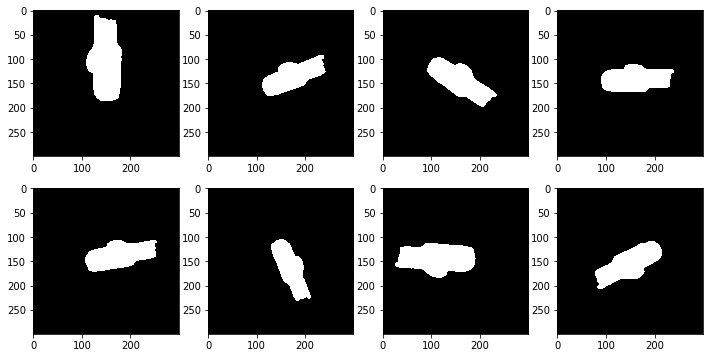

rock: 7 images


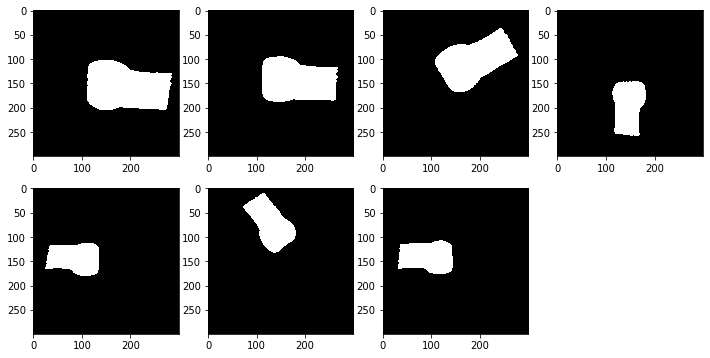

scissors: 8 images


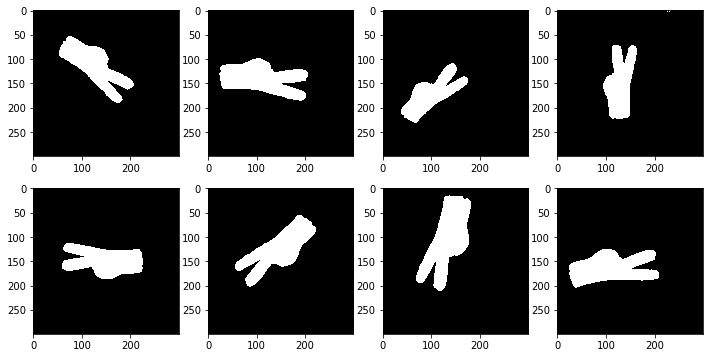

In [78]:
def show_images(imgs):
    C = 4
    N = len(imgs)
    R = (N - 1)//C + 1
    
    plt.figure(figsize=(C*3, R*3))
    for k, img in enumerate(imgs):
        plt.subplot(R, C, k+1)
        plt.imshow(img[100:400, 180:480], cmap='gray')
    plt.show()

for cat, imgs in imgs_per_cat.items():
    print(f'{cat}: {len(imgs)} images')
    show_images(imgs)